In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("lab04.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
#buy_computers dataset
#G.THANMAI
#BL.EN.U4CSE21054
#MONDAY (16/09/23)

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit_rating'] = label_encoder.fit_transform(df['credit_rating'])
df['buys_computer'] = label_encoder.fit_transform(df['buys_computer'])
print(df)

    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [41]:
#ENTROPY FOR EACH FEATURE
from math import log2
def entropy(df,attribute):
    val = df[attribute].value_counts(normalize=True)
    return -sum(p * log2(p) for p in val)

attributes = df.columns

entropy_values = {}
for a in attributes:
    entropy_val = entropy(df, a)
    entropy_values[a] = entropy_val
    
print(entropy_values)

{'age': 1.5774062828523454, 'income': 1.5566567074628228, 'student': 1.0, 'credit_rating': 0.9852281360342516, 'buys_computer': 0.9402859586706311}


In [42]:
#INFORMATION GAIN FOR EACH FEATURE
def information_gain(df, feature, target_attribute):
    total_entropy = entropy(df, target_attribute)
    values = df[feature].unique()
    weighted_entropy = 0
    
    for value in values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset, target_attribute)
    
    return total_entropy - weighted_entropy

target_attribute = 'buys_computer'
features = df.columns[:-1]

information_gains = {}

for feature in features:
    information_gains[feature] = information_gain(df, feature, target_attribute)

In [43]:
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain:.4f}")

print(f"The first feature for constructing the decision tree (root node) is: {root_node}")

Information Gains:
age: 0.2467
income: 0.0292
student: 0.1518
credit_rating: 0.0481
The first feature for constructing the decision tree (root node) is: age


In [44]:
x = df.iloc[:,0:4]

In [45]:
y = df.iloc[:,4]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [47]:
#depth of tree
from sklearn.tree import DecisionTreeClassifier
ml_model = DecisionTreeClassifier()
model = ml_model.fit(x_train,y_train)
model.score(x_train, y_train)
print(model.get_depth()) #print the tree depth

3


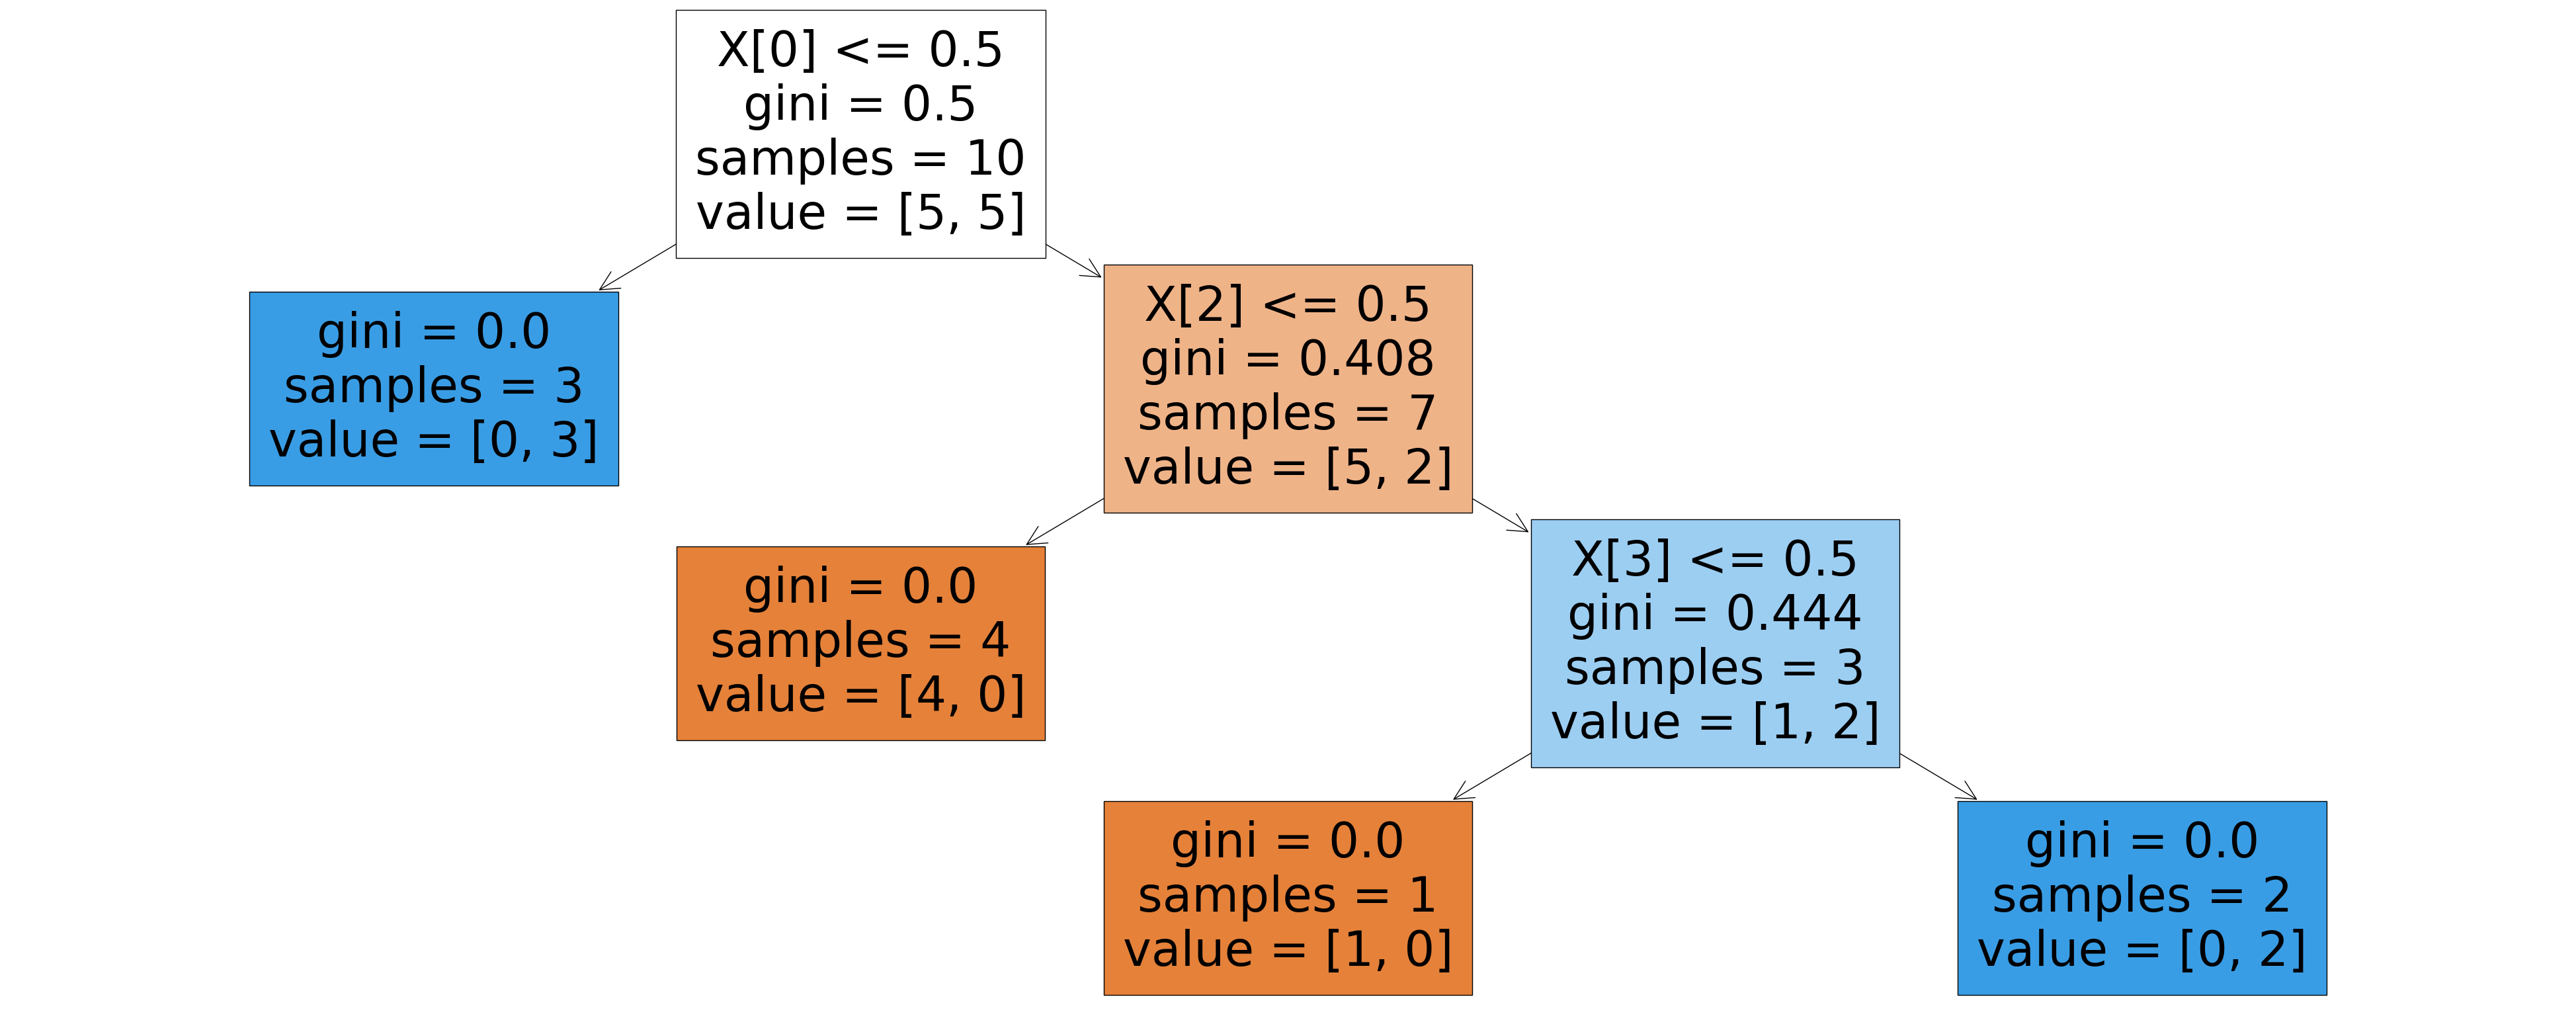

In [52]:
#decision tree classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,20))
plot_tree(model, filled=True)
plt.show()